# Analyse der Game Gruppierungen innerhalb der Twitter Streamer in Deutschland

## Leitfragen 

- "Gibt es **strukturelle Unterschiede** im Netzwerk **je nach** dem, welches **Game** gestreamt wird? **Wie verhalten sich die einzelnen Gruppierungen** zueinander?"

- Finden **Community Detection Algorithmen** die gleichen Gruppierungen?

## Metriken zum Vergleich von Subnetzwerken

- Density: Wie viele Kanten existieren im Vergleich zur maximal möglichen Anzahl (->vollständiger Graph)?
- Reciprocity: Wie viele Verbindungen sind bi-direktional?
- Triadic Closure: Wie viele Dreiecks-Verbindungen existieren? (also auch: Wieviele Dreiecke könnten noch existieren?)
- Average Clustering Coefficient: Sind die Nachbarn eines Knoten miteinander eng verbunden (bilden sie also cluster)?




In [63]:
import pandas as pd
import networkx as nx
import nxviz as nv 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [3]:
#load the nx graph object, stored in a pickle file
G = nx.read_gpickle("who_follows_who_new2.pickle")

In [4]:
#inspect graph object
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1223
Average in degree:  15.6795
Average out degree:  15.6795


In [5]:
unique_values=set([d["game"] for n,d in G.nodes(data=True)])
unique_values

{nan,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0}

In [6]:
subgraphs=[]
final_games=[]
for val in unique_values:
    game_nodes=[]
    for n,d in G.nodes(data=True):
        if d["game"]==val:
            #print(n)
            game_nodes.append(n)
    
    if len(game_nodes)>=4:
        subgraph=G.subgraph(game_nodes)
        subgraphs.append(subgraph)
        final_games.append(val)
    

In [7]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1223
Average in degree:  15.6795
Average out degree:  15.6795


In [8]:
[len(subgraph) for subgraph in subgraphs]

[23, 6, 12, 7, 4]

In [9]:
final_games

[4.0, 5.0, 6.0, 8.0, 12.0]

In [10]:
final_games=["Just Chatting", "League of Legends", "Variety", "Fortenite", "GTA 5"]

In [11]:
for graph in subgraphs:
    print(nx.info(graph))
    print([n for n in graph.nodes(data=True)])
    #nx.draw(graph)

Name: 
Type: DiGraph
Number of nodes: 23
Number of edges: 213
Average in degree:   9.2609
Average out degree:   9.2609
[('rewinside', {'followerCount': 1383174.0, 'game': 4.0}), ('rezomusik', {'followerCount': 467950.0, 'game': 4.0}), ('Dekarldent', {'followerCount': 31214.0, 'game': 4.0}), ('ELoTRiX', {'followerCount': 259130.0, 'game': 4.0}), ('Doktor_Froid', {'followerCount': 24401.0, 'game': 4.0}), ('TANZVERBOTcf', {'followerCount': 195972.0, 'game': 4.0}), ('Angeschrien', {'followerCount': 25650.0, 'game': 4.0}), ('mcky_tv', {'followerCount': 160497.0, 'game': 4.0}), ('StaiyLIVE', {'followerCount': 72112.0, 'game': 4.0}), ('Niklas_Wilson_', {'followerCount': 18158.0, 'game': 4.0}), ('fayesxh', {'followerCount': 4835.0, 'game': 4.0}), ('TheRealKnossi', {'followerCount': 144284.0, 'game': 4.0}), ('Shurjoka', {'followerCount': 36990.0, 'game': 4.0}), ('Julien_Bam', {'followerCount': 1724776.0, 'game': 4.0}), ('Mexify', {'followerCount': 90697.0, 'game': 4.0}), ('Taddl', {'followerCou

[]

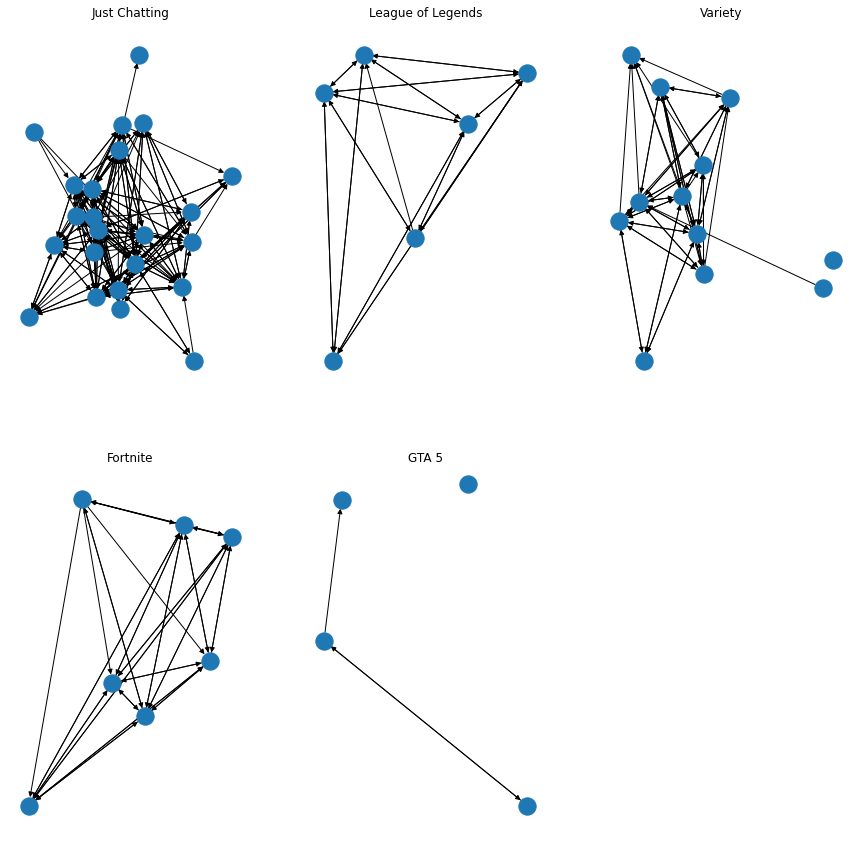

In [12]:
pos=nx.spring_layout(G, k=1,iterations=30)
plt.figure(figsize=(15,15))
#plt.title("Subgraphs of Streamer Network: Game-Categories")

plt.subplot(2,3,1)
plt.title("Just Chatting")
nx.draw(subgraphs[0],pos=pos)
plt.plot()



plt.subplot(2,3,2)
plt.title("League of Legends")
nx.draw(subgraphs[1],pos=pos)
plt.plot()

plt.subplot(2,3,3)
plt.title("Variety")
nx.draw(subgraphs[2],pos=pos)
plt.plot()

plt.subplot(2,3,4)
plt.title("Fortnite")
nx.draw(subgraphs[3],pos=pos)
plt.plot()

plt.subplot(2,3,5)
plt.title("GTA 5")
nx.draw(subgraphs[4],pos=pos)
plt.plot()

In [13]:
result_df=pd.DataFrame(columns=["size", "density", "clustering coeff", "reciprocity", "triadic closure",
                               "avg in-deg", "avg out-deg", "avg in-cc", "avg out-cc"])

In [14]:
idx = list(range(4,23,1))
for i, g in zip(final_games, subgraphs[:]):
    result_df.loc[i] = [len(g), nx.density(g),  nx.average_clustering(g), 
     nx.algorithms.overall_reciprocity(g), nx.transitivity(g),
                       np.mean([v for k, v in g.in_degree()]),
                    np.mean([v for k, v in g.out_degree()]),
                     np.mean(list(nx.closeness_centrality(g).values())),
                      np.mean(list(nx.closeness_centrality(g.reverse()).values()))]
    #result_df["size"]=len(g)
    #result_df["density"]=nx.density(g)
    #result_df["clustering coeff"]=nx.average_clustering(g)
    #result_df[""]

In [15]:
result_df.loc["full graph"] = [78, 0.2036, 0.5246, 0.7833, 0.4936, 15.68, 15.68, 0.4673, 0.4598]

In [16]:
result_df

,size,density,clustering coeff,reciprocity,triadic closure,avg in-deg,avg out-deg,avg in-cc,avg out-cc
Just Chatting,23.0,0.420949,0.658602,0.845070,0.614376,9.260870,9.260870,0.595218,0.583482
League of Legends,6.0,0.900000,0.914583,0.962963,0.906250,4.500000,4.500000,0.924603,0.916667
Variety,12.0,0.462121,0.646746,0.819672,0.680108,5.083333,5.083333,0.522010,0.538491
Fortenite,7.0,0.928571,0.940000,0.923077,0.950000,5.571429,5.571429,0.952381,0.938776
GTA 5,4.0,0.250000,0.000000,0.666667,0.000000,0.750000,0.750000,0.277778,0.277778
full graph,78.0,0.203600,0.524600,0.783300,0.493600,15.680000,15.680000,0.467300,0.459800


## Interpretation

**Spiele Gruppen** sind **sehr stark vernetzt**, **Ausnahme GTA 5**

Streamer, die **vielzahl verschiender Spiele** zeigen oder **nur chatten**, 
sind **viel weniger** untereinander **vernetzt**, haben aber eine erhöhte reciprocity


Alle Graphen sind **dichter** als der ursprüngliche Graph.

Insgesamt entsprechen die Ergebnisse den Erwartungen.

### Comunity Detection Algorithms


Wir wollen Gruppierungen mithilfe von Algorithmen finden, unabhängig unserer im Datensatz vorhandenen Kategorien Labels.


In [17]:
print(list(nx.isolates(G)))

[]


COMMUNTIES DETECTED:  2


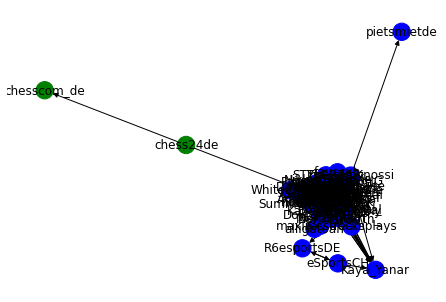

In [64]:
from networkx.algorithms.community.centrality import girvan_newman

G = nx.read_gpickle("who_follows_who_new2.pickle")
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

#print(node_groups)
print("COMMUNTIES DETECTED: ", len(node_groups))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [59]:
from networkx.algorithms.community import greedy_modularity_communities, modularity

G_undir= G.to_undirected()
communities = greedy_modularity_communities(G_undir)
#print(communities)
node_groups = []
for com in communities:
    node_groups.append(list(com))
    
for i, nodeset in enumerate(communities):
        for n in nodeset:
            G_undir.nodes[n]["subgraph"] = i

#print(node_groups)
print("COMMUNTIES DETECTED: ", len(node_groups))


COMMUNTIES DETECTED:  4


In [60]:
print(modularity(G_undir,node_groups))

0.23393510087871439


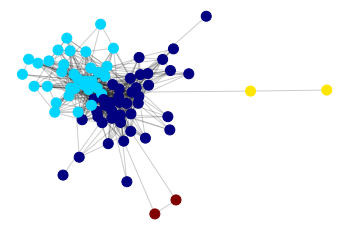

In [62]:

# create number for each group to allow use of colormap
from itertools import count
# get unique groups
groups = set(nx.get_node_attributes(G_undir,'subgraph').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G_undir.nodes()
colors = [mapping[G_undir.nodes[n]['subgraph']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(G_undir)
ec = nx.draw_networkx_edges(G_undir, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G_undir, pos, nodelist=nodes, node_color=colors, 
                             node_size=100, cmap=plt.cm.jet)
#plt.colorbar(nc)
plt.axis('off')
plt.show()


In [55]:
print(modularity(G_undir,communities))

0.23393510087871439


## Connected Components Analysis

In [27]:
n_strong = nx.components.number_strongly_connected_components(G)
n_strong

6

In [28]:
strong_cc_size=[len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
strong_cc_size

[72, 2, 1, 1, 1, 1]

In [29]:

def label_connected_component_subgraphs(G):
    """Label all connected component subgraphs."""
    G = G.copy()
    for i, nodeset in enumerate(nx.strongly_connected_components(G)):
        for n in nodeset:
            G.nodes[n]["subgraph"] = i
    return G


def plot_cc_subgraph(G):
    """Plot all connected component subgraphs."""
    c = nv.plots.CircosPlot(G,node_grouping="subgraph", node_color="subgraph", 
                        #group_legend=True,
                       group_label_position="middle")
    c.draw()
    plt.show() 



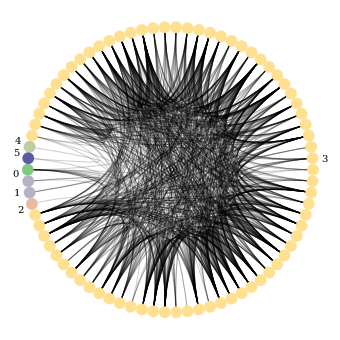

In [30]:
G = label_connected_component_subgraphs(G)
plot_cc_subgraph(G)

In [31]:
enumerate(nx.strongly_connected_components(G))

In [32]:
#which nodes are not part of the huge strongly connected compoenent
print(sorted(nx.strongly_connected_components(G), key=len, reverse=True)[1:])

[{'eSportsCH', 'R6esportsDE'}, {'Kaya_Yanar'}, {'pietsmietde'}, {'chesscom_de'}, {'chess24de'}]


In [35]:
n_weak = nx.components.number_weakly_connected_components(G)
n_weak

1

In [36]:
weak_cc_size=[len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]
weak_cc_size

[78]

## Find the periphery nodes

- smallest closeness centrality
- largest diameter

In [37]:
clo_cen = nx.closeness_centrality(G)
clo_res= sorted(clo_cen.items(),
       key=lambda x:x[1], reverse=True)[-10:]
print(clo_res)

[('jessirocksplays', 0.3803653973145499), ('MailandWoT', 0.36991579848722705), ('katooyoooo', 0.36589497459062675), ('pietsmietde', 0.3567411969473825), ('WhiteCatOsu', 0.3300229182582124), ('R6esportsDE', 0.3217958512076159), ('fayesxh', 0.28407036001972713), ('eSportsCH', 0.2418941602615072), ('chesscom_de', 0.012987012987012988), ('chess24de', 0.0)]


In [38]:
S =  max(nx.strongly_connected_components(G), key=len)
G_CC = G.subgraph(S)
print(nx.info(G_CC))

Name: 
Type: DiGraph
Number of nodes: 72
Number of edges: 1204
Average in degree:  16.7222
Average out degree:  16.7222


In [39]:
print(nx.algorithms.distance_measures.diameter(G_CC))

5


In [40]:
periphery_nodes = nx.algorithms.distance_measures.periphery(G_CC)
periphery_nodes

['WhiteCatOsu', 'alligatoah']